In [1]:
#Import required libraries
from bs4 import BeautifulSoup as bs
import requests
import re
import pandas as pd
from time import sleep
import numpy as np
import random

In [137]:
# This function loads the key in our text file as list

def get_keys ():
    f = open("IMDB_key_a.txt", "r")
    key = f.read()
    f.close()
    items = key.split(',')
    return items

    
    

In [128]:
#Grab user movie title to search for

def join_string(string):
    
    #string = input ('Enter the movie name here: ')
    user_query =string.split(' ')
    user_string='+'.join(user_query)
    return user_string


In [138]:
keys=[i for i in get_keys()]
key = keys[0:5]
#num_of_key = 3
#key =random.sample(keys, num_of_key)
#print(key)

In [139]:
#Search user_query using IMDB search tool and
#Get the movie link to extract movie code

def get_movie_code():
    search_url = requests.get('https://www.imdb.com/find?q='+join_string('red sparrow'))

    soup_search = bs(search_url.content)
    for item in soup_search:
        link= list(soup_search.find('td', class_="result_text").a['href'][7:-1])
        link_w = ''.join(link)
        
    if link_w.startswith('tt', 0, 2):
        return link_w
    else:
        print('Movie not found. Try another movie title \nEnter correct movie Title')

#get_movie_code()

In [140]:
#Getting reviews

def get_review ():
    title_ = []
    text_ = []
    ratings =  []
    
    url = 'https://www.imdb.com/title/'+get_movie_code()+'/reviews'
    
    review_url = requests.get(url)
    if (review_url.status_code == 200):

        soup_review = bs(review_url.content)

        #print(review_url.status_code, 'Success!')

        content = soup_review.find('div', class_="lister-list")

        for titles in content.find_all('a', class_='title'):
            title = titles.get_text()
            title_.append(title)

        for texts  in content.find_all('div', class_="text show-more__control"):
            text = texts.get_text(separator=' ', strip=True)
            text_.append(text)

        for rating  in content.find_all('span',class_="rating-other-user-rating" ):
            rating_ = rating.get_text(separator=' ',strip=True)
            ratings.append(rating_[0:2])
    
    else:
        print('Connection timeout! \n Try again later')
    data = {'title': title_, 'text': text_, 'ratings': ratings}
    return data

df_1 = pd.concat([pd.Series(v, name=k) for k, v in get_review().items()], axis=1)

In [141]:
#Getting paginated reviews

def get_review_paginated ():
    title_ = []
    text_ = []
    ratings =  []
    
    
    for x in key:
            url2 = 'https://www.imdb.com/title/'+get_movie_code()+'/reviews/_ajax?ref_=undefined&paginationKey='+x
            sleep(0.2)
            #print (url)
            review_url2 = requests.get(url2)

            soup_review2 = bs(review_url2.content)

            #print(review_url.status_code, 'Success!')

            content2 = soup_review2.find('div', class_="lister-list") #review-container


            for titles2 in content2.find_all('a', class_='title'):
                title2 = titles2.get_text()
                title_.append(title2)

            for texts2  in content2.find_all('div', class_="text show-more__control"):
                text2 = texts2.get_text(separator=' ', strip=True)
                text_.append(text2)

            for rating2  in content2.find_all('span',class_="rating-other-user-rating" ):
                rating_2 = rating2.get_text(separator=' ',strip=True)
                ratings.append(rating_2[0:2])
                
    data = {'title': title_, 'text': text_, 'ratings': ratings}
    return data

df_2 = pd.concat([pd.Series(v, name=k) for k, v in get_review_paginated().items()], axis=1)

In [142]:

main_df = pd.concat([df_1, df_2], ignore_index = True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    150 non-null    object
 1   text     150 non-null    object
 2   ratings  130 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [133]:
lend = len(main_df)
print(lend)

100


In [143]:
main_df = main_df.dropna().drop_duplicates()

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 132
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    120 non-null    object
 1   text     120 non-null    object
 2   ratings  120 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


In [145]:
main_df=main_df.reset_index(drop=True)
main_df.head()

,title,text,ratings
0,Flies high enough but doesn't quite soar\n,"The book, that 'Red Sparrow' is adapted from, ...",7
1,"Interesting, but not without problems\n",RED SPARROW is the latest Hollywood spy thrill...,6
2,straddling the divide\n,Russian prima ballerina Dominika Egorova (Jenn...,6
3,For the easily entertained\n,"""Red Sparrow"" is a new American movie and the ...",4
4,Highly Entertaining\n,The Bolshoi ballerina Dominika Egorova (Jennif...,7


In [109]:
#data
#df1 = pd.DataFrame.from_dict(data)
df1 = pd.DataFrame.from_dict(data, orient='index')
df2 = df1.transpose()
df2.tail(60)

,title,text,ratings
0,"Interesting, but not without problems\n",RED SPARROW is the latest Hollywood spy thrill...,6
1,straddling the divide\n,Russian prima ballerina Dominika Egorova (Jenn...,6
2,For the easily entertained\n,"""Red Sparrow"" is a new American movie and the ...",4
3,Highly Entertaining\n,The Bolshoi ballerina Dominika Egorova (Jennif...,7
4,This bird does not take off\n,Red Sparrow highlights the continuing misogyny...,1
5,"If you don't matter to the men in power, you ...",Dominika Egorova (Jennifer Lawrence) is a ball...,8
6,Not taking prisoners\n,"Or exchanging them for that matter, if that is...",8
7,Red Sparrow\n,"The trailer for this movie, based on a well-re...",5
8,A gripping and gritty spy thriller\n,Following an accident which ends the career of...,9
9,"Ladies are trained in Russia to be ""sparrows""...",My wife and I watched this at home on DVD. Whi...,8


In [146]:
#Save review to file

main_df.to_csv ('Red_Sparrow_review.csv', index = False, header=True)

### REVIEW EXPLORATION

#### Data Cleaning

In [2]:
#Load the csv data

data  = pd.read_csv('Red_Sparrow_review.csv')

In [3]:
#Clean data and remove stopwords
data.replace(r'\n',' ', regex=True, inplace=True) #remove next line character
#data.head()

In [4]:
test_data = data
test_data.head()

,title,text,ratings
0,Flies high enough but doesn't quite soar,"The book, that 'Red Sparrow' is adapted from, ...",7
1,"Interesting, but not without problems",RED SPARROW is the latest Hollywood spy thrill...,6
2,straddling the divide,Russian prima ballerina Dominika Egorova (Jenn...,6
3,For the easily entertained,"""Red Sparrow"" is a new American movie and the ...",4
4,Highly Entertaining,The Bolshoi ballerina Dominika Egorova (Jennif...,7


### Sentiment Analysis

In [9]:
# Import required library for sentiment analysis
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [203]:
#Removing stop words 

def cleanText (word):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(word)
    #token_list = [token for token in doc]
    return [token for token in doc if not token.is_stop]
    

In [7]:
# LABEL RATING AS INTERESTING (7-10)...COOL (5-6)...OR BORING (1-4)
def pol_label (word):
   # score = sentiment_score(word)
  
    # decide sentiment as positive, negative or neutral
    if word >= 8 :
        return "Interesting"
        
  
    elif word >= 5 and word < 8 :
        return "Cool"
        
    elif word >= 3 and word < 5 :
        return "Not Cool"   
  
    else :
        return "Boring"

#test_data ['polarity'] = test_data['text'].apply(lambda x: sentiment_score(x))

test_data ['recommendation'] = test_data['ratings'].apply(lambda x: pol_label(x))

In [237]:
test_data.tail()

,title,text,ratings,recommendation
115,For the easily entertained,"""Red Sparrow"" is a new American movie and the ...",7,Cool
116,Highly Entertaining,The Bolshoi ballerina Dominika Egorova (Jennif...,8,Interesting
117,This bird does not take off,Red Sparrow highlights the continuing misogyny...,8,Interesting
118,"If you don't matter to the men in power, you ...",Dominika Egorova (Jennifer Lawrence) is a ball...,9,Interesting
119,Red Sparrow,"The trailer for this movie, based on a well-re...",7,Cool


### Visualisation

In [5]:
# Import the required library
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


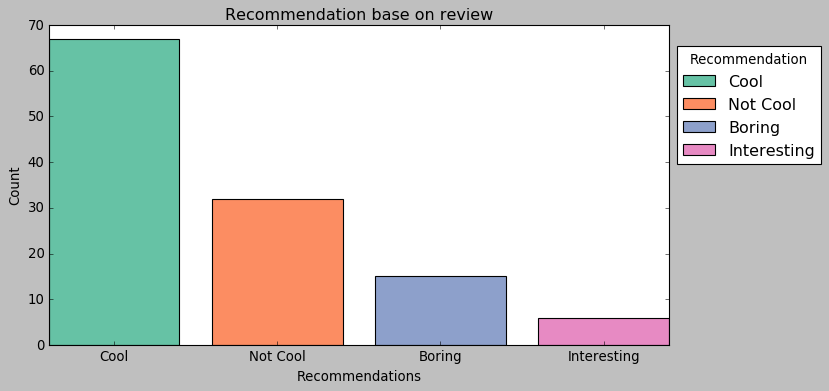

In [158]:
## BAR CHART for Recommendation

plt.style.use('classic')#Solarize_Light2,classicseaborn-white
themes = sns.color_palette("Set2") #choosing color...Set2husl

labels = test_data["recommendation"].unique()

fig, ax = plt.subplots(figsize=(10,5)) 
wedges = ax.bar(x=test_data["recommendation"].unique(), height=test_data["recommendation"].value_counts(), width=0.8, color= themes)

ax.legend(wedges, labels,
          title="Recommendation",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1.5))

#plt.setp(autotexts, size=10)

plt.xlabel("Recommendations")
plt.ylabel("Count")
plt.title("Recommendation base on review")

#plt.xticks(rotation=45)

plt.show()

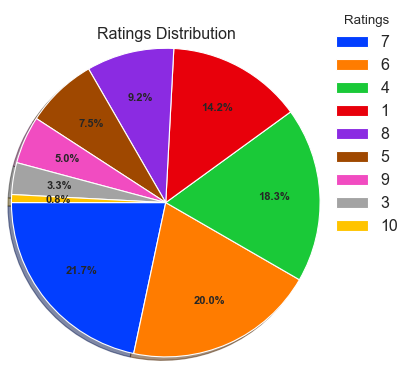

In [365]:
#PIE CHART for Rating

labels = test_data["ratings"].unique()

fig1, ax1 = plt.subplots(figsize=(5,5))

colors = sns.color_palette("bright") #choosing color



wedges, texts, autotexts = ax1.pie(data.ratings.value_counts(), autopct='%1.1f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
        shadow=True, startangle=180, pctdistance=0.7, radius=1.0, colors=colors)

ax1.legend(wedges, labels,
          title="Ratings",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1.5))

plt.setp(autotexts, size=10, weight="bold")


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Ratings Distribution")
plt.show()

##### WordCloud

In [376]:
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1, 'Popular words in Title')

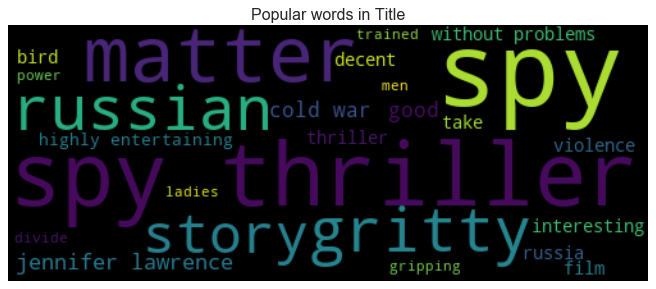

In [411]:
text = test_data['title'].values
stopwords = set(STOPWORDS)
stopwords.add('film thus')
stopwords.add("movie")
stopwords.add("Red Sparrow")
stopwords.add("Red")
stopwords.add("Sparrow")
stopwords.add("sparrows")

wordcloud = WordCloud(width=400, height=200, max_words=25, stopwords=stopwords, random_state=20).generate(str(text).lower())
#background_color='#30D0D0', colormap="Accent",

#plt.imshow(wordcloud)

#plt.figure(figsize=(10, 5), facecolor='k')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.title('Popular words in Title')

#To save the plot as png
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

### STREAMLIT APP

In [ ]:
# Token = 10e417467c0f2e8bb5ef8f229e3e21cd388f52f38a429800